In [1]:
# Cargamos librerias

from sklearn.cluster import MiniBatchKMeans

import seaborn as sns

iris = sns.load_dataset("iris")
dataset = iris
print(dataset.head(5))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [2]:
X = dataset.drop('species', axis=1)
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8).fit(X)
print("Centros totales: ", len(kmeans.cluster_centers_))
print("=" * 64)
print(dataset.head(5))

print(kmeans.predict(X))

dataset['group'] = kmeans.predict(X)

Centros totales:  4
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 3 1 3 1 1 2 1 1 1 3
 3 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 3 3 1 1 1 3 1 1 1 3 3
 1 3]


In [3]:
# Mean Shift

from sklearn.cluster import MeanShift

iris = sns.load_dataset("iris")
dataset = iris
dataset.head(5)

X = dataset.drop('species', axis=1)

meanshift = MeanShift().fit(X)
print(meanshift.labels_)
len(meanshift.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


150



Analisis de componentes principales



In [4]:
dataset['meanshift'] = meanshift.labels_

# Analisis de componentes principales

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)

X = dataset.drop('species', axis=1)

meanshift = MeanShift().fit(pca_data)

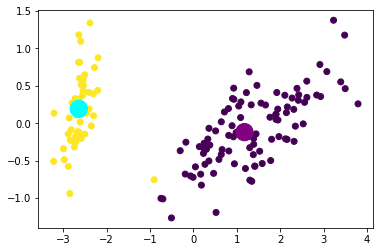

In [5]:
import matplotlib.pyplot as plt

plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=meanshift.predict(pca_data))
plt.scatter(meanshift.cluster_centers_[:, 0],
            meanshift.cluster_centers_[:, 1],
            c=['purple', 'cyan'], s=300)
plt.show()